<a href="https://colab.research.google.com/github/Khushil-Modi/SJSU/blob/main/CMPE%20257/Midterm%20Project/CMPE-257%20Midterm%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kmeans-pytorch

# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch
from kmeans_pytorch import kmeans, kmeans_predict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

# Data Loading

In [ ]:
data_raw = pd.read_csv('/content/drive/MyDrive/Datasets/data-final.csv', sep='\t') #Dataset from drive
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3     1013558 non-null  float64
 3   EXT4     1013558 non-null  float64
 4   EXT5     1013558 non-null  float64
 5   EXT6     1013558 non-null  float64
 6   EXT7     1013558 non-null  float64
 7   EXT8     1013558 non-null  float64
 8   EXT9     1013558 non-null  float64
 9   EXT10    1013558 non-null  float64
 10  EST1     1013558 non-null  float64
 11  EST2     1013558 non-null  float64
 12  EST3     1013558 non-null  float64
 13  EST4     1013558 non-null  float64
 14  EST5     1013558 non-null  float64
 15  EST6     1013558 non-null  float64
 16  EST7     1013558 non-null  float64
 17  EST8     1013558 non-null  float64
 18  EST9     1013558 non-null  float64
 19  EST10    1013558 non-null  float64
 20  AG

# Data Cleaning

In [ ]:
data.isna().sum()

EXT1       1783
EXT2       1783
EXT3       1783
EXT4       1783
EXT5       1783
EXT6       1783
EXT7       1783
EXT8       1783
EXT9       1783
EXT10      1783
EST1       1783
EST2       1783
EST3       1783
EST4       1783
EST5       1783
EST6       1783
EST7       1783
EST8       1783
EST9       1783
EST10      1783
AGR1       1783
AGR2       1783
AGR3       1783
AGR4       1783
AGR5       1783
AGR6       1783
AGR7       1783
AGR8       1783
AGR9       1783
AGR10      1783
CSN1       1783
CSN2       1783
CSN3       1783
CSN4       1783
CSN5       1783
CSN6       1783
CSN7       1783
CSN8       1783
CSN9       1783
CSN10      1783
OPN1       1783
OPN2       1783
OPN3       1783
OPN4       1783
OPN5       1783
OPN6       1783
OPN7       1783
OPN8       1783
OPN9       1783
OPN10      1783
country      77
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isna().sum()

EXT1       0
EXT2       0
EXT3       0
EXT4       0
EXT5       0
EXT6       0
EXT7       0
EXT8       0
EXT9       0
EXT10      0
EST1       0
EST2       0
EST3       0
EST4       0
EST5       0
EST6       0
EST7       0
EST8       0
EST9       0
EST10      0
AGR1       0
AGR2       0
AGR3       0
AGR4       0
AGR5       0
AGR6       0
AGR7       0
AGR8       0
AGR9       0
AGR10      0
CSN1       0
CSN2       0
CSN3       0
CSN4       0
CSN5       0
CSN6       0
CSN7       0
CSN8       0
CSN9       0
CSN10      0
OPN1       0
OPN2       0
OPN3       0
OPN4       0
OPN5       0
OPN6       0
OPN7       0
OPN8       0
OPN9       0
OPN10      0
country    0
dtype: int64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(1009391, 51)

#Data Visualization

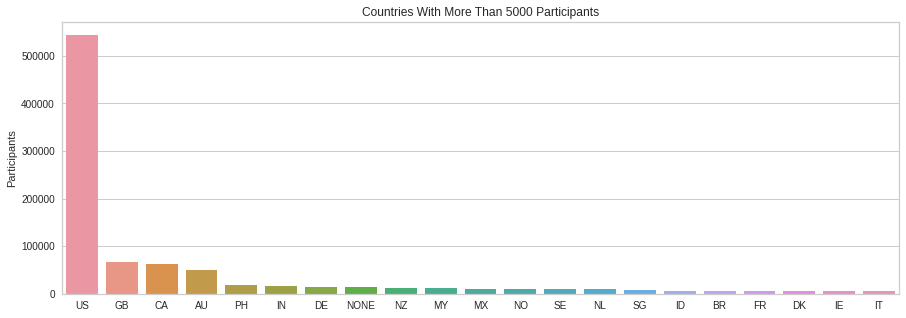

In [ ]:
# Participants' nationality distriution
countries = pd.DataFrame(data['country'].value_counts())
countries_5000 = countries[countries['country'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x=countries_5000.index, y='country')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants');

In [ ]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

In [ ]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

Q&As Related to Extroversion Personality


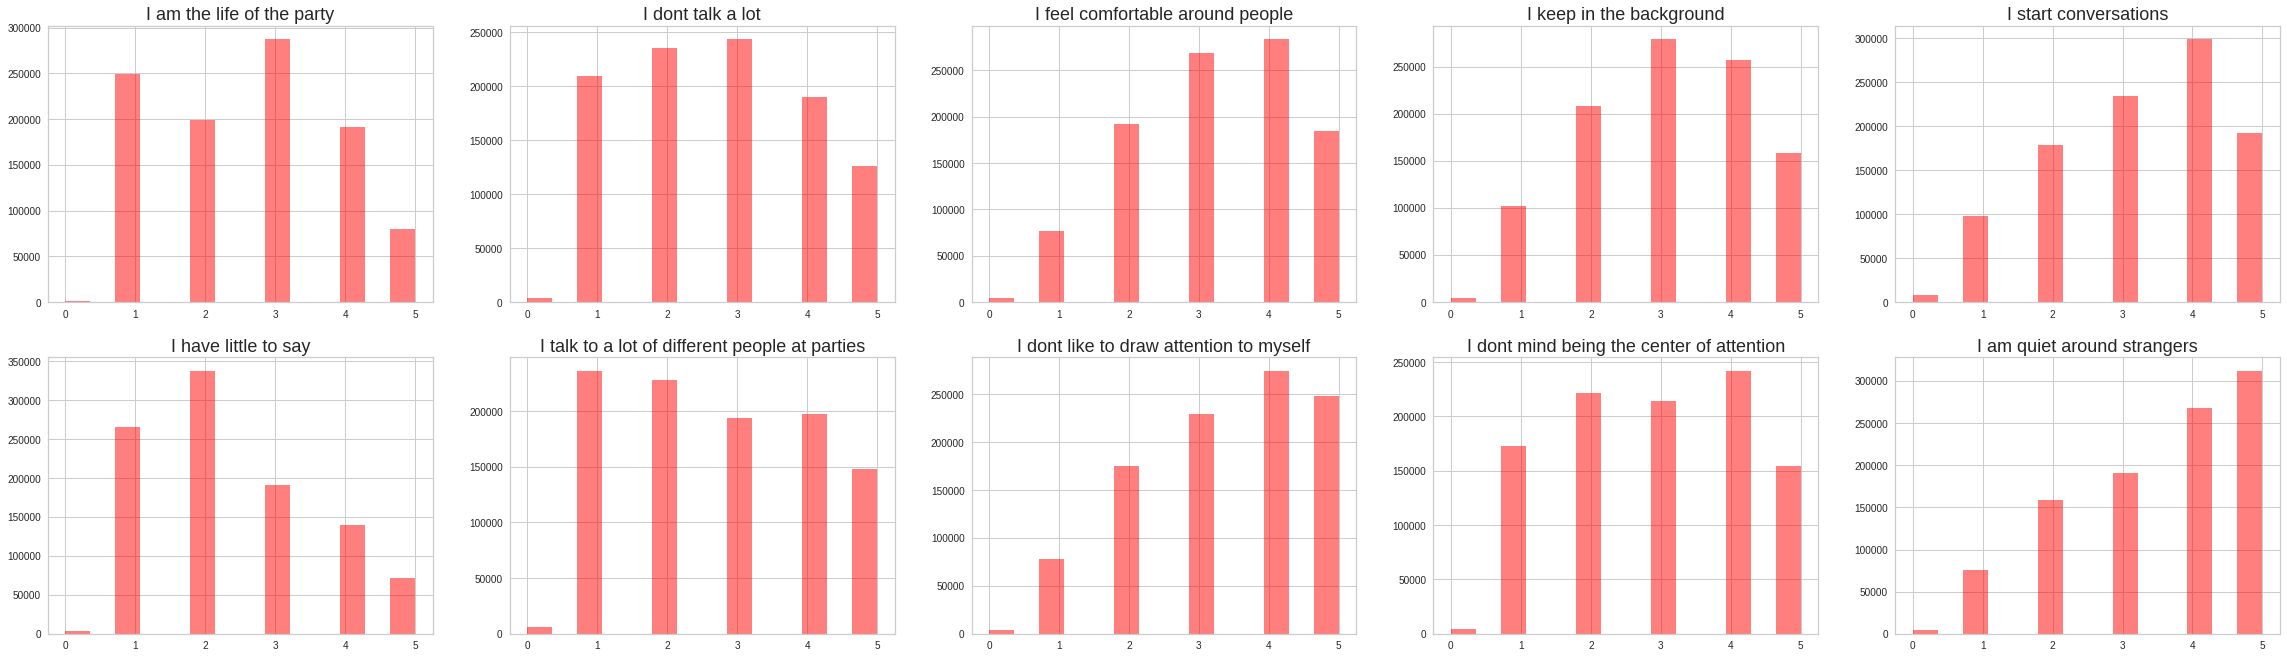

In [ ]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'red')

Q&As Related to Neuroticism Personality


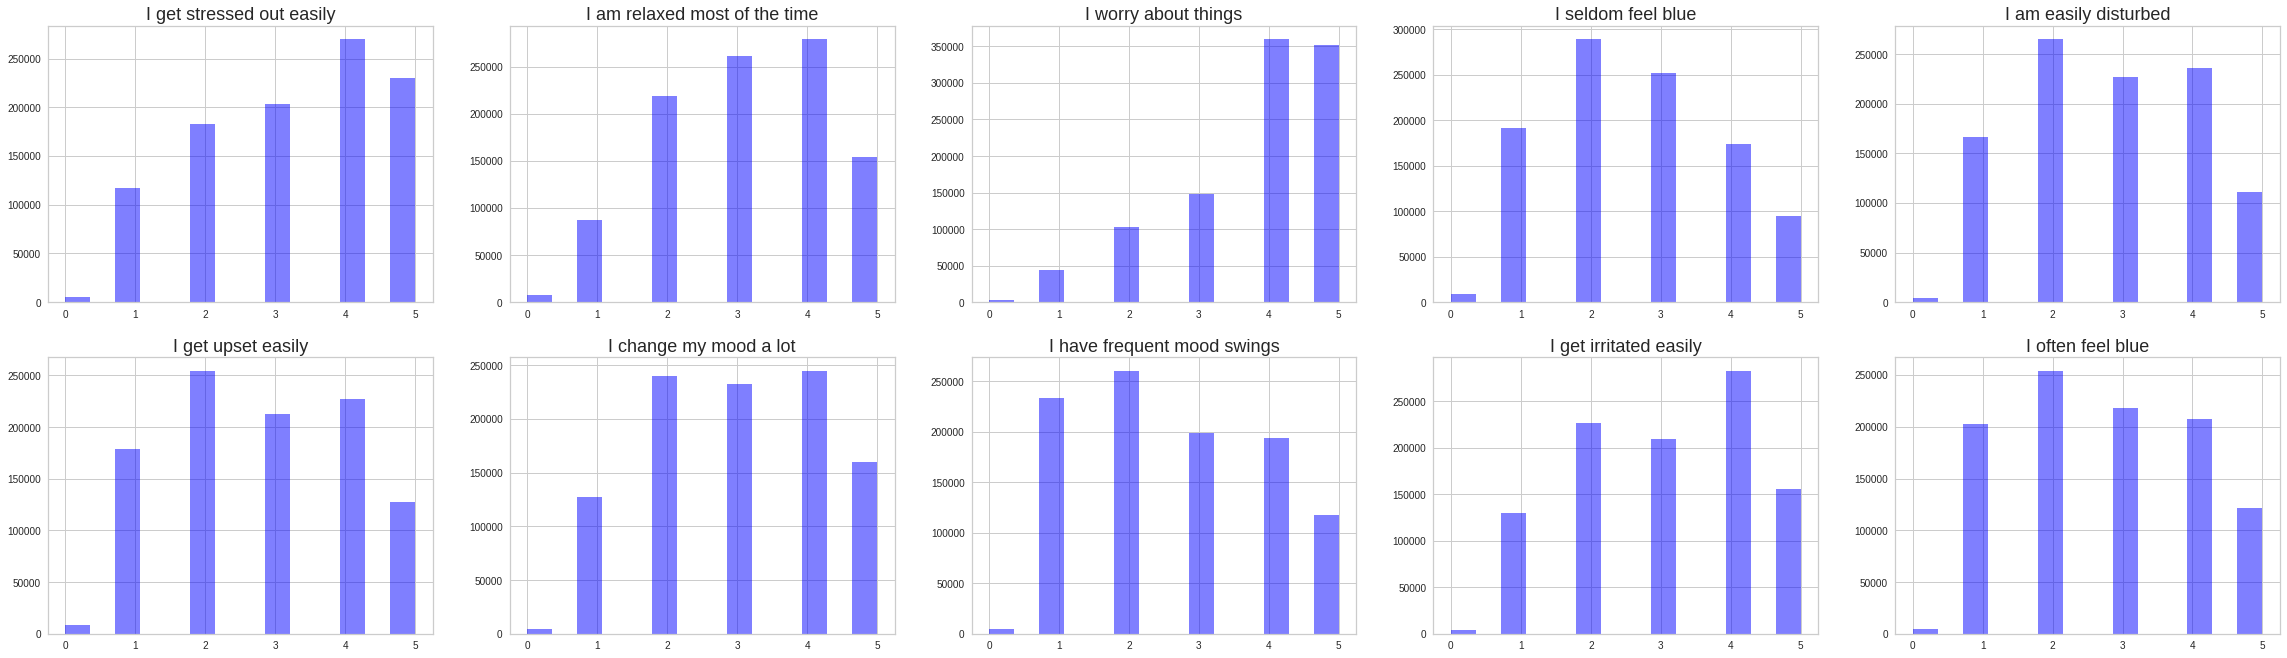

In [ ]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'blue')

Q&As Related to Agreeable Personality


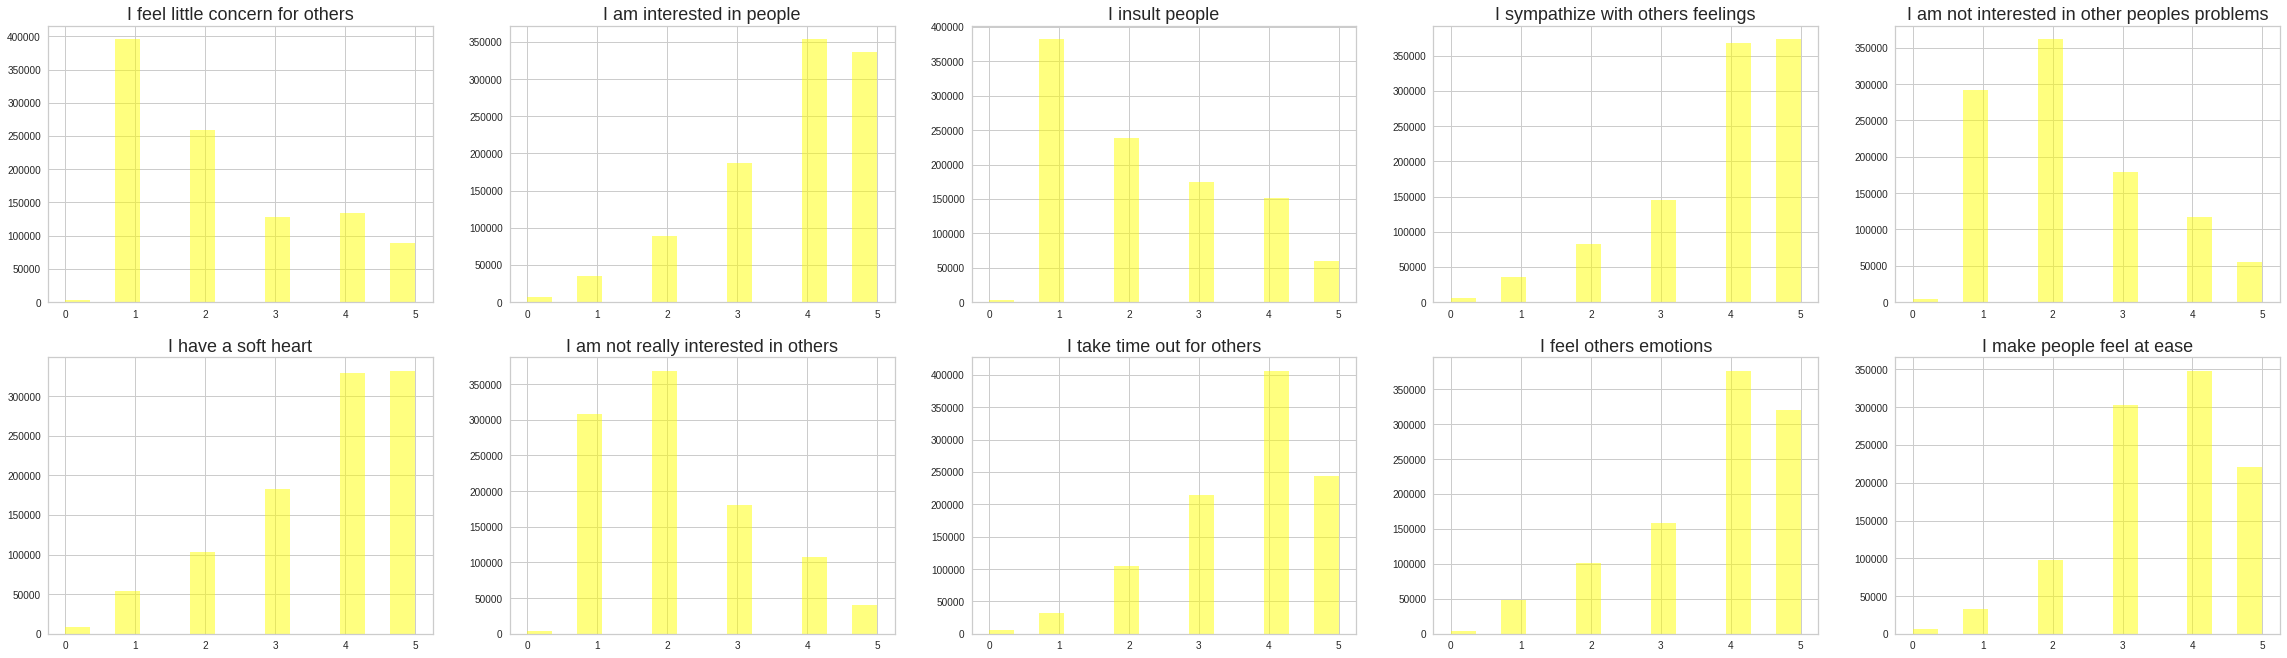

In [ ]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'yellow')

Q&As Related to Conscientious Personality


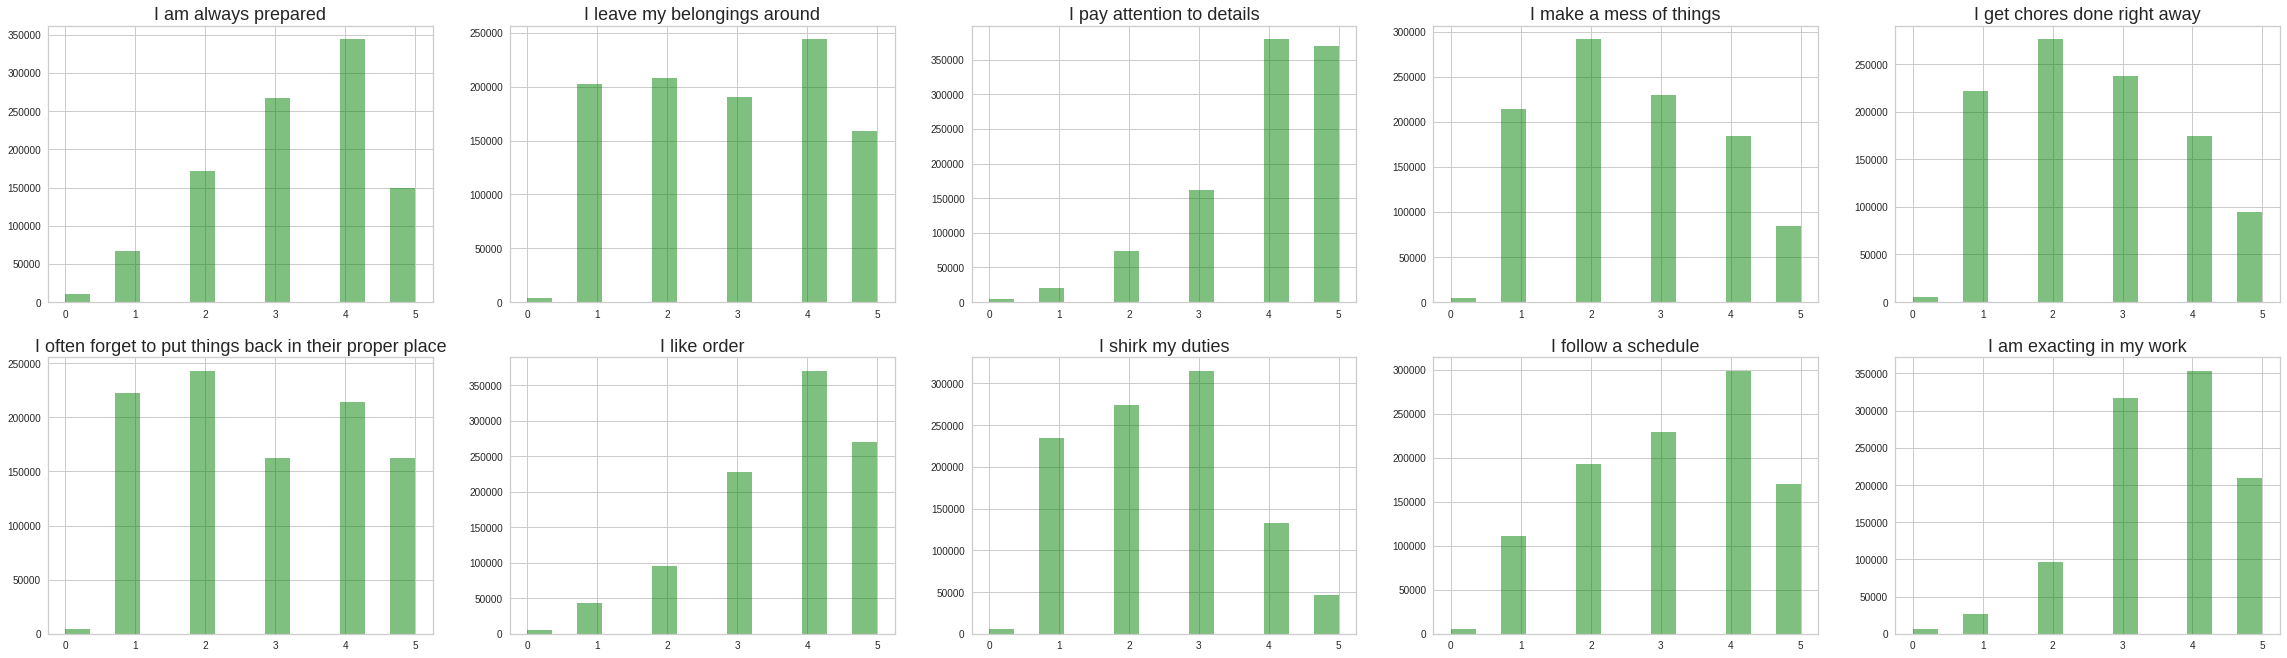

In [ ]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'green')

Q&As Related to Open Personality


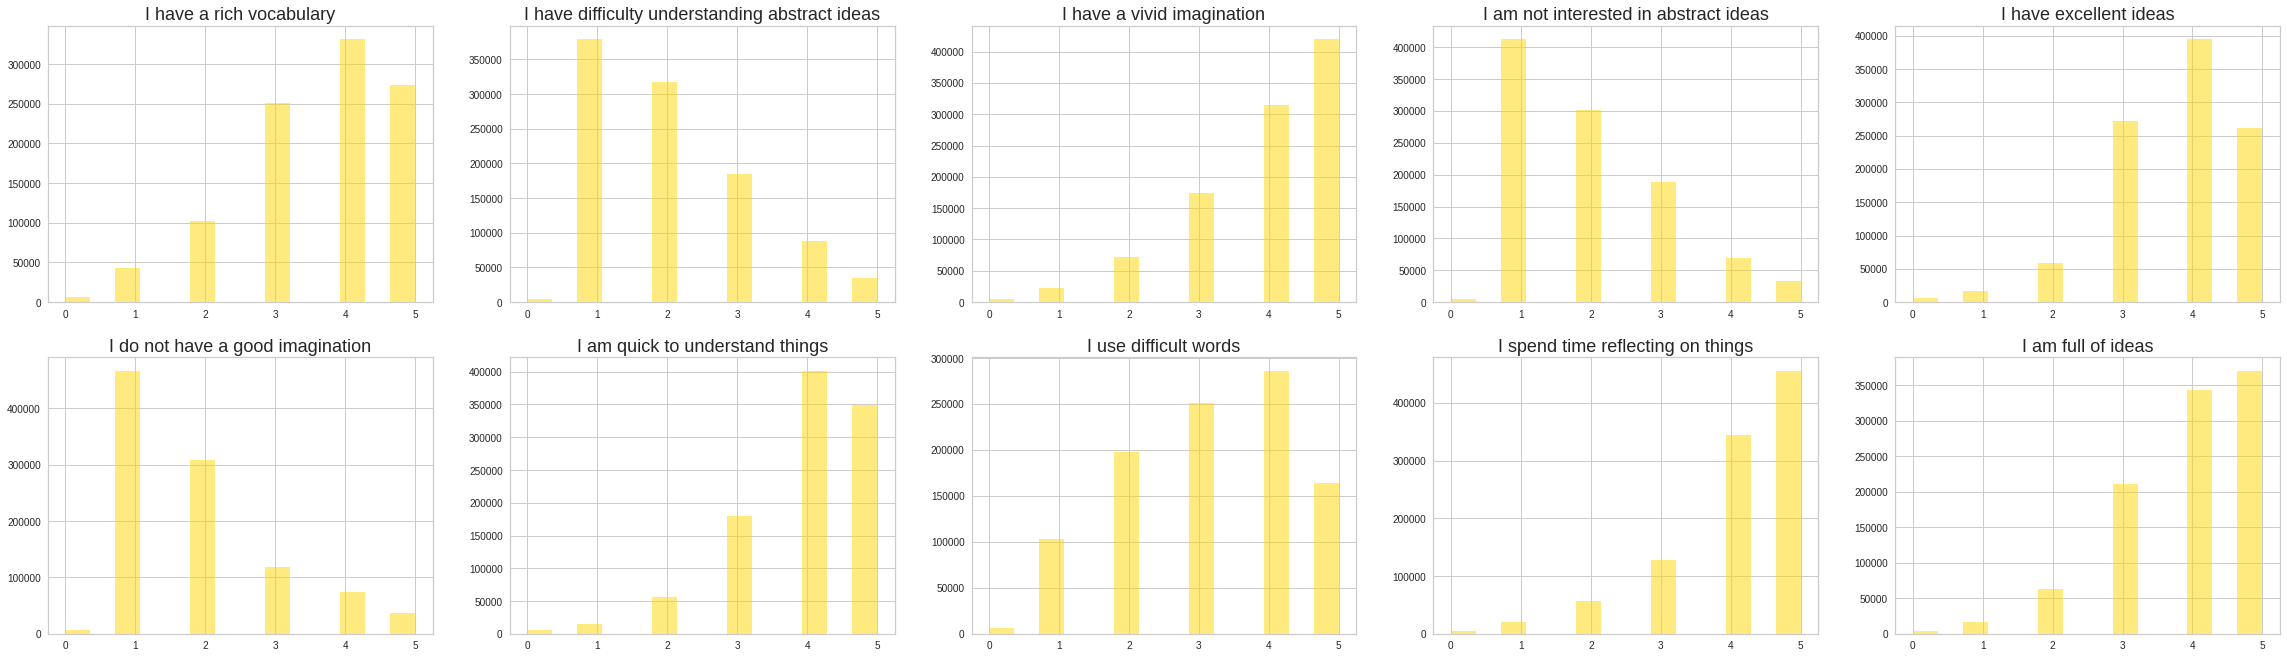

In [ ]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'gold')

In [ ]:
data1 = data.drop('country', axis=1)

In [ ]:
data1.shape

(1009391, 50)

#PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(data1)
X_scaled = scaler.transform(data1)

In [ ]:
pca_2 = PCA(n_components = 5)
data_embeddings_pca_2 = pca_2.fit_transform(X_scaled)

# KMeans using Scikit Learn

In [ ]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

data = data.drop('country', axis=1)
columns = list(data.columns)

scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=columns)
data_sample = data[:5000]

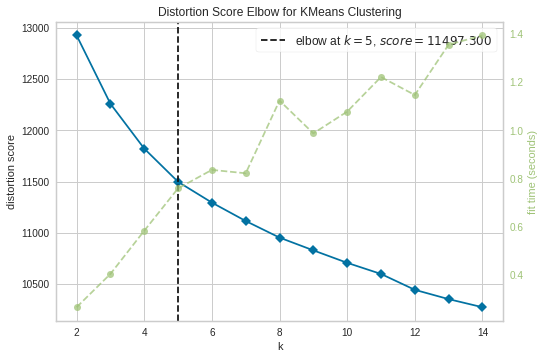

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(2,15))
visualizer.fit(data_sample)
visualizer.poof()

In [ ]:
kme = KMeans(n_clusters=5).fit(data1)
kme.labels_

array([4, 1, 1, ..., 3, 1, 3], dtype=int32)

In [ ]:
y_kmeans = km.fit_predict(data1)

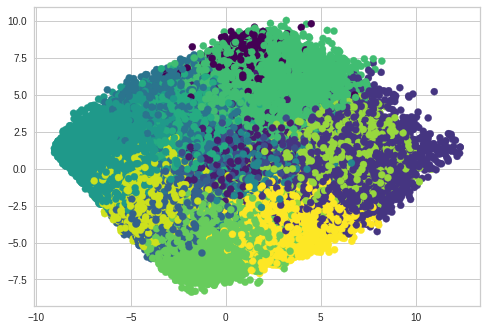

In [ ]:
plt.scatter(data_embeddings_pca_2[:, 0], data_embeddings_pca_2[:, 1], c=y_kmeans, s=50, cmap='viridis')

# KMeans Using PyTorch

In [ ]:
# data
data_size, dims, num_clusters = 100000, 2, 5
x = torch.from_numpy(data1.to_numpy())

In [ ]:
# kmeans
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=5, distance='euclidean', device=torch.device('cuda:0')
)

running k-means on cuda:0..


[running kmeans]: 47it [01:15,  1.60s/it, center_shift=0.000071, iteration=47, tol=0.000100]


In [ ]:
cluster_ids_x

tensor([0, 4, 4,  ..., 2, 4, 2])

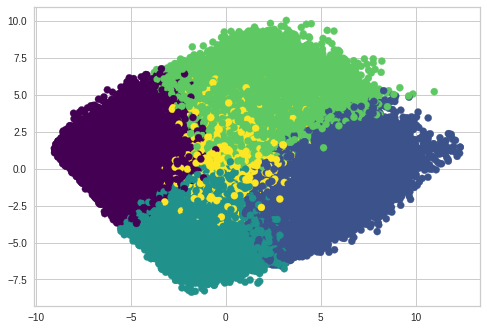

In [ ]:
plt.scatter(data_embeddings_pca_2[:, 0], data_embeddings_pca_2[:, 1], c=cluster_ids_x, s=50, cmap='viridis')

#Week-2

#Gausian Mixture Model Custering using Scikit Learn

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(data1)
y_gmm = gmm.fit_predict(data1)
y_gmm

array([1, 4, 1, ..., 1, 3, 1])

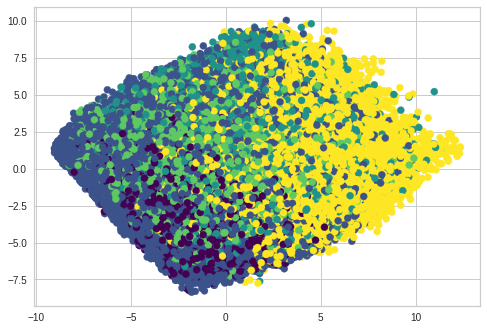

In [ ]:
plt.scatter(data_embeddings_pca_2[:, 0], data_embeddings_pca_2[:, 1], c=y_gmm, s=50, cmap='viridis')

#K-Means with 5000 Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler =  StandardScaler()
scaler.fit(data_sample)
X_scaled1 = scaler.transform(data_sample)

In [ ]:
pca_3 = PCA(n_components = 5)
data_embeddings_pca_3 = pca_3.fit_transform(X_scaled1)

In [ ]:
mk = KMeans(n_clusters=5).fit(data_sample)
mk.labels_

array([3, 2, 2, ..., 3, 0, 3], dtype=int32)

In [ ]:
mk.cluster_centers_

array([[0.3376    , 0.7614    , 0.4382    , 0.8324    , 0.45      ,
        0.6618    , 0.3332    , 0.8278    , 0.42      , 0.9072    ,
        0.8392    , 0.502     , 0.898     , 0.4248    , 0.701     ,
        0.7596    , 0.7838    , 0.7242    , 0.794     , 0.784     ,
        0.4968    , 0.6664    , 0.5314    , 0.7568    , 0.51      ,
        0.7484    , 0.5444    , 0.6748    , 0.7168    , 0.5806    ,
        0.5596    , 0.6636    , 0.755     , 0.6906    , 0.3992    ,
        0.7014    , 0.7054    , 0.6188    , 0.5508    , 0.6576    ,
        0.7002    , 0.4774    , 0.7976    , 0.4428    , 0.678     ,
        0.428     , 0.7402    , 0.6276    , 0.8392    , 0.7278    ],
       [0.47619048, 0.63756614, 0.59417989, 0.66719577, 0.54550265,
        0.54973545, 0.45634921, 0.68518519, 0.57486772, 0.75185185,
        0.48095238, 0.7521164 , 0.5984127 , 0.61137566, 0.47857143,
        0.40132275, 0.47619048, 0.4026455 , 0.52169312, 0.4526455 ,
        0.61851852, 0.62354497, 0.54206349, 0.5

In [ ]:
centers = np.array(mk.cluster_centers_)

In [ ]:
y_mk = km.fit_predict(data_sample)

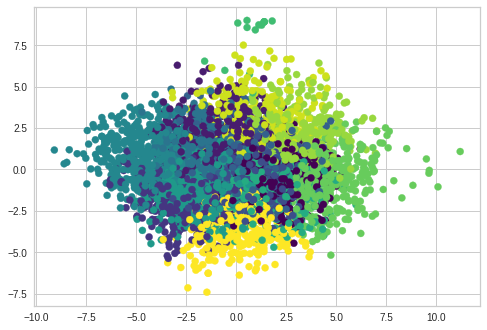

In [ ]:
plt.scatter(data_embeddings_pca_3[:, 0], data_embeddings_pca_3[:, 1], c=y_mk, s=50, cmap='viridis')

# Cluster with GMM & DBSCAN

In [ ]:
from sklearn.mixture import GaussianMixture
gmm1 = GaussianMixture(n_components=5).fit(data_sample)
y_gmm1 = gmm1.fit_predict(data_sample)
y_gmm1

array([3, 1, 3, ..., 3, 0, 3])

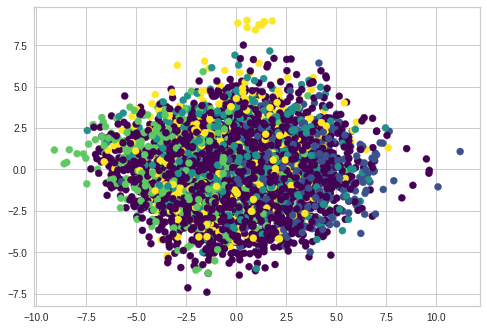

In [ ]:
plt.scatter(data_embeddings_pca_3[:, 0], data_embeddings_pca_3[:, 1], c=y_gmm1, s=50, cmap='viridis')

# BIRCH Clustering

In [ ]:
from sklearn.cluster import Birch

In [ ]:
bir = Birch(n_clusters=5).fit(data_sample)
bir.labels_

array([1, 1, 0, ..., 1, 4, 1])

In [ ]:
y_bir = bir.fit_predict(data_sample)
y_bir

array([1, 1, 0, ..., 1, 4, 1])

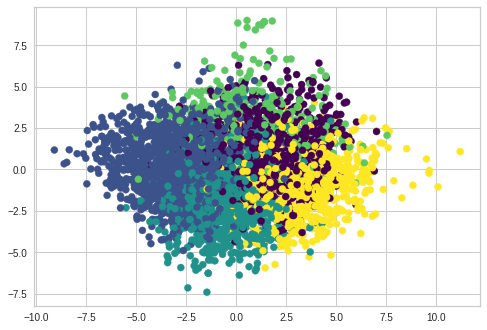

In [ ]:
plt.scatter(data_embeddings_pca_3[:, 0], data_embeddings_pca_3[:, 1], c=y_bir, s=50, cmap='viridis')

#Comparing K-means, GMM and Birch

1) The Gausian Mixture is more robust, but seems to be slower than K-Means and Birch as it takes more iterations to the EM algorithm to reach convergence.

2) The GM sometimes converge to a local minima which is not a optimal solution

3) The time required for Birch in this example is the least following by K-Means and lastly GMM.

4) If we use a GMM followed by K-Means the results become better exponentially.

In [ ]:
data.drop('country',axis=1,inplace=True)

In [ ]:
# Creating the "Extrovision"  personality column  (Average of all the questions)
extroversion = (data['EXT1'] + data['EXT2'] + data['EXT3'] + data['EXT4'] + data['EXT5'] + data['EXT6'] + data['EXT7'] + data['EXT8'] + data['EXT9'] + data['EXT10'])/10
data['Extroversion'] = extroversion

# Creating the "Neuroticism" personality column  (Average of all the questions)
neuroticism = (data['EST1'] + data['EST2'] + data['EST3'] + data['EST4'] + data['EST5'] + data['EST6'] + data['EST7'] + data['EST6'] + data['EST9'] + data['EST10'])/10
data['neuroticism'] = neuroticism

# Creating the "Agreeable" personality column  (Average of all the questions)
agreeable = (data['AGR1'] + data['AGR2'] + data['AGR3'] + data['AGR4'] + data['AGR5'] + data['AGR6'] + data['AGR7'] + data['AGR8'] + data['AGR9'] + data['AGR10'])/10
data['agreeable'] = agreeable

# Creating the "Conscientious" personality column  (Average of all the questions)
conscientious= (data['CSN1'] + data['CSN2'] + data['CSN3'] + data['CSN4'] + data['CSN5'] + data['CSN6'] + data['CSN7'] + data['CSN8'] + data['CSN9'] + data['CSN10'])/10
data['conscientious'] = conscientious

# Creating the "open" personality column  (Average of all the questions)
open = (data['OPN1'] + data['OPN2'] + data['OPN3'] + data['OPN4'] + data['OPN5'] + data['OPN6'] + data['OPN7'] + data['OPN8'] + data['OPN9'] + data['OPN10'])/10
data['open'] = open

data = data.drop(data.loc[:, 'EXT1':'OPN10'].columns, axis=1)
data.head()

,Extroversion,neuroticism,agreeable,conscientious,open
0,3.0,2.4,3.1,3.2,3.3
1,3.4,2.1,3.2,3.1,2.7
2,2.9,2.6,2.8,2.8,3.1
3,2.6,2.7,3.2,2.7,3.1
4,3.5,2.3,3.0,3.2,3.6


In [ ]:
data1 = data
Personality = (data1['Extroversion'] + data1['conscientious'] + data1['neuroticism'] + data1['agreeable'] + data1['open'])
data1['Personality'] = Personality
data1 = pd.DataFrame(data1)
data1.shape

(1009391, 6)

In [ ]:
a = data1['Personality'].tolist()
b = [0] * len(a)
for i in range(0,1009391):
  if a[i]<12.0:
    b[i]= "Bad" 
  elif a[i]>=12.0 and a[i]<17.0 :
    b[i] = "Medium" 
  else:
    b[i]= "Good"

data1.head()

,Extroversion,neuroticism,agreeable,conscientious,open,Personality
0,3.0,2.4,3.1,3.2,3.3,15.0
1,3.4,2.1,3.2,3.1,2.7,14.5
2,2.9,2.6,2.8,2.8,3.1,14.2
3,2.6,2.7,3.2,2.7,3.1,14.3
4,3.5,2.3,3.0,3.2,3.6,15.6


In [ ]:
d = pd.DataFrame(b)
d

,0
0,Medium
1,Medium
2,Medium
3,Medium
4,Medium
...,...
1009386,Medium
1009387,Medium
1009388,Medium
1009389,Medium


In [ ]:
data1 = pd.concat([data1, d], axis=1, join='inner')
data1

,Extroversion,neuroticism,agreeable,conscientious,open,Personality,0
0,3.0,2.4,3.1,3.2,3.3,15.0,Medium
1,3.4,2.1,3.2,3.1,2.7,14.5,Medium
2,2.9,2.6,2.8,2.8,3.1,14.2,Medium
3,2.6,2.7,3.2,2.7,3.1,14.3,Medium
4,3.5,2.3,3.0,3.2,3.6,15.6,Medium
...,...,...,...,...,...,...,...
1009386,2.8,3.2,2.4,1.8,1.9,12.1,Medium
1009387,3.0,4.2,2.9,3.6,3.3,17.0,Medium
1009388,2.8,2.9,3.3,3.4,2.8,15.2,Medium
1009389,2.9,3.2,3.1,3.1,3.1,15.4,Medium


In [ ]:
data1.set_axis([*data1.columns[:-1], 'Test'], axis=1, inplace=True)

In [ ]:
data1.dropna()
data1.drop_duplicates()
data1.shape

(1003477, 7)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data1['Test'])

data1['Test'] = le.transform(data1['Test'])
data1

,Extroversion,neuroticism,agreeable,conscientious,open,Personality,Test
0,3.0,2.4,3.1,3.2,3.3,15.0,2
1,3.4,2.1,3.2,3.1,2.7,14.5,2
2,2.9,2.6,2.8,2.8,3.1,14.2,2
3,2.6,2.7,3.2,2.7,3.1,14.3,2
4,3.5,2.3,3.0,3.2,3.6,15.6,2
...,...,...,...,...,...,...,...
1009386,2.8,3.2,2.4,1.8,1.9,12.1,2
1009387,3.0,4.2,2.9,3.6,3.3,17.0,2
1009388,2.8,2.9,3.3,3.4,2.8,15.2,2
1009389,2.9,3.2,3.1,3.1,3.1,15.4,2


In [ ]:
data1['Test'].value_counts()

2    868816
1    130449
0      4212
Name: Test, dtype: int64

#Week-3

##Fractal Clustering

In [ ]:
df = data1[:8000]
df['Test'].value_counts()

2    6955
1    1004
0      41
Name: Test, dtype: int64

In [ ]:
# Function to generate silhoutte score and SSE aas a metric to determine ideal number of cluster 
def plot_cluster(df, max_loop= 20):
    """
    Looking at the performance of various number of clusters using K-Means.
    Performance is evaluated by within cluster SSE and silhouette score.
    """
    try:
        df.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    
    # robust scaling is used so that the centering and scaling statistics are therefore not influenced by a few number of very large marginal outliers as they are based on percentiles
    rb = RobustScaler()
    X_rb = rb.fit_transform(X) #apply k-means
    
    sse_within_cluster = {}
    silhouette_score = {}
    
    for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X_rb)
        sse_within_cluster[k] = kmeans.inertia_
        silhouette_score[k] = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)

    _ = plt.figure(figsize=(10,6))
    # Generating the images 
    ax1 = plt.subplot(211)
    _ = plt.plot(list(sse_within_cluster.keys()), list(sse_within_cluster.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("SSE Within Cluster")
    _ = plt.title("Within Cluster SSE After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    ax2 = plt.subplot(212)
    _ = plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
    _ = plt.xlabel("Number of Clusters")
    _ = plt.ylabel("Silhouette Score")
    _ = plt.title("Silhouette Score After K-Means Clustering")
    _ = plt.xticks([i for i in range(2, max_loop)], rotation=75)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)

In [ ]:
# we will use the robust method to scale the data and thereafter, we will apply kmeans clustering 
def apply_cluster(df, clusters=2):
    """
    Applying K-Means with the optimal number of clusters identified
    """
    try:
        data1.drop('cluster', axis=1, inplace=True)
    except:
        next
    X = df.iloc[:,1:]
    rb = RobustScaler()
    X_rb = rb.fit_transform(X)
    kmeans = KMeans(n_clusters=clusters, random_state=10, n_init=10)  
    kmeans.fit(X_rb) 
    score = metrics.silhouette_score(X_rb, kmeans.labels_, random_state=10)
    df['cluster'] = kmeans.labels_
    sse_within_cluster = kmeans.inertia_
    # calculating the silhoutte score and sse values 
    print("clustering performance")
    print("-----------------------------------")
    print("silhouette score: " + str(round(score,2)))
    print("sse withing cluster: " + str(round(sse_within_cluster)))
    
    return df
# plt.scatter(data_embeddings_pca[:, 0], data_embeddings_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')

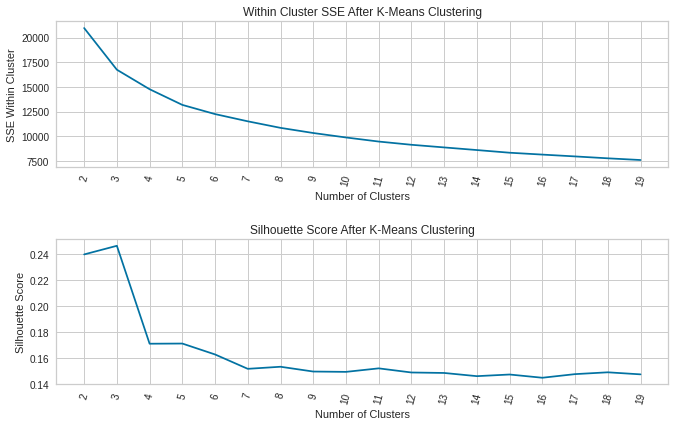

In [ ]:
plot_cluster(df)

In [ ]:
firsttrail = apply_cluster(df, clusters = 3)

clustering performance
-----------------------------------
silhouette score: 0.25
sse withing cluster: 16746


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
firsttrail

,Extroversion,neuroticism,agreeable,conscientious,open,Personality,Test,cluster
0,3.0,2.4,3.1,3.2,3.3,15.0,2,1
1,3.4,2.1,3.2,3.1,2.7,14.5,2,1
2,2.9,2.6,2.8,2.8,3.1,14.2,2,1
3,2.6,2.7,3.2,2.7,3.1,14.3,2,1
4,3.5,2.3,3.0,3.2,3.6,15.6,2,1
...,...,...,...,...,...,...,...,...
8010,3.5,3.9,3.8,2.8,3.1,17.1,2,0
8011,3.1,3.9,3.2,3.0,3.3,16.5,2,0
8012,3.4,3.6,3.0,3.3,3.3,16.6,2,0
8013,2.9,2.5,2.9,3.1,3.0,14.4,1,1


In [ ]:
cluster_per = (firsttrail.groupby('cluster').agg({"Extroversion" :"mean","neuroticism" :"mean","agreeable" :"mean","conscientious" :"mean","open" :"mean",}).reset_index())
# Calculating the average of all the 5 personalities
count = np.bincount(firsttrail.cluster)

cluster_per['ClusterCount'] = count
cluster_per

,cluster,Extroversion,neuroticism,agreeable,conscientious,open,ClusterCount
0,0,3.111254,3.440317,3.316580,3.346326,3.424119,3661
1,1,2.992256,2.755762,3.041294,2.935103,3.121887,4313
2,2,0.546154,0.323077,0.457692,0.369231,0.350000,26


In [ ]:
df2_sub = df.query("cluster == 0").reset_index(drop = True)
df2_sub

,Extroversion,neuroticism,agreeable,conscientious,open,Personality,Test,cluster
0,3.5,3.0,3.3,2.9,3.7,16.4,2,0
1,3.1,3.4,2.9,3.2,3.8,16.4,2,0
2,3.6,3.8,4.1,4.4,3.5,19.4,1,0
3,2.8,3.8,3.8,3.3,4.2,17.9,1,0
4,3.3,3.6,4.0,3.5,3.6,18.0,1,0
...,...,...,...,...,...,...,...,...
3656,3.0,3.8,2.9,3.0,3.6,16.3,2,0
3657,2.7,3.6,3.9,3.5,3.4,17.1,2,0
3658,3.5,3.9,3.8,2.8,3.1,17.1,2,0
3659,3.1,3.9,3.2,3.0,3.3,16.5,2,0


###Second Clustering

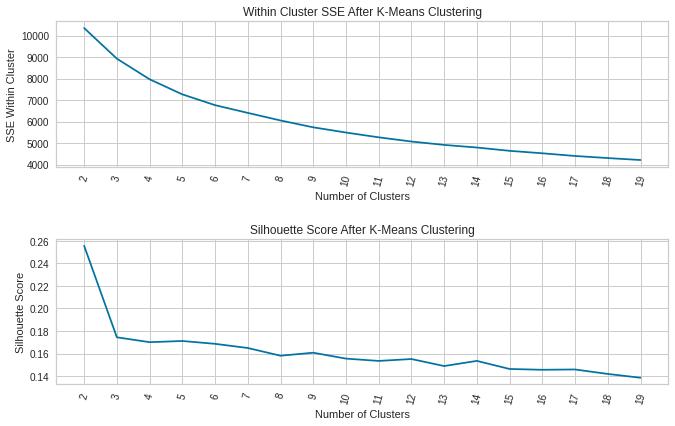

In [ ]:
plot_cluster(df2_sub, max_loop=20)

In [ ]:
second_trial= apply_cluster(df2_sub, clusters=3)

clustering performance
-----------------------------------
silhouette score: 0.25
sse withing cluster: 9006


In [ ]:
cluster_per1 = (second_trial.groupby('cluster').agg({"Extroversion" :"mean","neuroticism" :"mean","agreeable" :"mean","conscientious" :"mean","open" :"mean",}).reset_index())
# Calculating the average of all the 5 personalities
count = np.bincount(second_trial.cluster)

cluster_per1['ClusterCount'] = count
cluster_per1

,cluster,Extroversion,neuroticism,agreeable,conscientious,open,ClusterCount
0,0,3.076440,3.645877,3.301505,3.160209,3.231217,1528
1,1,3.057393,2.981707,3.200457,3.409604,3.539024,1312
2,2,3.262119,3.790621,3.530207,3.591596,3.599513,821


In [ ]:
df2_sub2 = df2_sub.query("cluster == 1").reset_index(drop = True)
df2_sub2            

,Extroversion,neuroticism,agreeable,conscientious,open,Personality,Test,cluster
0,3.1,3.4,2.9,3.2,3.8,16.4,2,1
1,3.0,2.4,3.0,3.7,4.2,16.3,2,1
2,3.6,2.7,3.7,3.0,3.9,16.9,2,1
3,3.8,2.1,3.2,3.5,3.4,16.0,2,1
4,2.6,3.7,2.9,3.2,3.6,16.0,2,1
...,...,...,...,...,...,...,...,...
1307,3.1,2.3,3.3,3.5,3.4,15.6,2,1
1308,3.3,2.8,3.5,3.5,3.3,16.4,1,1
1309,2.9,3.8,3.0,3.3,3.8,16.8,2,1
1310,3.2,2.9,3.3,3.2,3.5,16.1,2,1


###Third Internal Clustering

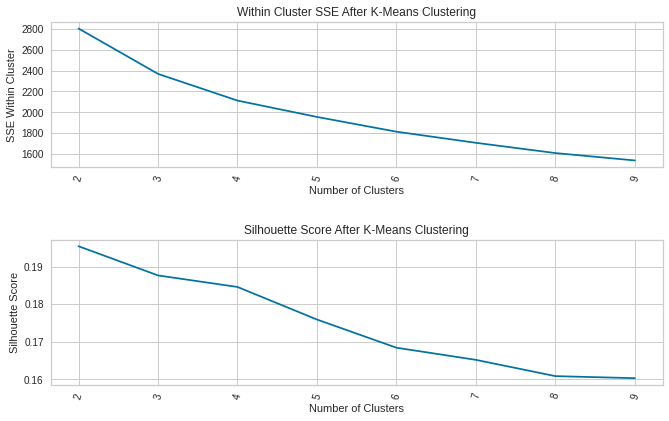

In [ ]:
plot_cluster(df2_sub2, max_loop=10)

In [ ]:
third_trial= apply_cluster(df2_sub2, clusters=9)

clustering performance
-----------------------------------
silhouette score: 0.22
sse withing cluster: 1580


In [ ]:
cluster_per3 = (third_trial.groupby('cluster').agg({"Extroversion" :"mean","neuroticism" :"mean","agreeable" :"mean","conscientious" :"mean","open" :"mean",}).reset_index())
# Calculating the average of all the 5 personalities
count = np.bincount(third_trial.cluster)

cluster_per3['ClusterCount'] = count
cluster_per3

,cluster,Extroversion,neuroticism,agreeable,conscientious,open,ClusterCount
0,0,2.884211,3.651579,2.670526,3.450526,3.690526,95
1,1,3.163354,2.714907,3.459627,3.173913,3.555280,161
2,2,2.906522,2.981884,3.070290,3.187681,3.810870,138
3,3,2.934536,3.306701,2.911340,3.337629,3.425258,194
4,4,3.109314,2.829902,3.428922,3.413235,3.262745,204
5,5,3.133149,3.270718,3.160221,3.562983,3.524309,181
6,6,3.123077,2.229670,3.401099,3.510989,3.784615,91
7,7,3.114844,3.017187,3.438281,3.347656,3.748438,128
8,8,3.110833,2.638333,3.155833,3.816667,3.350833,120


Thus this is the number of people with bad personalities in the society and they need to work on themselves to be better human beings. Thus this above is our golden cluster.

#Week-4

###Loading Dataset 2

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/Datasets/ML-Dataset 2 Top Personality/2018-personality-data.csv")
data2

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,95858,4.271995,115713,4.611922,26674,4.459407,93040,4.147292,117533,4.098206,108979,4.064843,112582,4.149100,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,1247,4.266540,953,4.211322,2010,4.408341,1234,4.090358,5291,4.202424,106642,4.113912,1209,4.094422,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,77658,4.710444,101895,5.029360,1260,4.698602,5971,4.660769,98491,4.962319,926,4.706864,1204,4.645191,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,33779,4.002232,96728,3.981009,77307,4.059373,111759,3.888507,7762,4.368495,26082,4.554531,89753,4.145526,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,1199,4.069527,83134,4.336292,5971,4.091813,68237,4.217929,745,4.101192,4973,4.244278,47099,4.473696,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,126397,4.006561,109710,3.947412,99171,4.003978,119194,4.002666,69483,4.235115,45691,4.191760,58530,3.965657,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,5.0,3.5,1.5,3.5,2.5,serendipity,medium,6874,4.241766,38061,4.350788,46578,4.399071,4848,4.749688,44195,4.493639,4979,4.397887,7438,4.207513,3897,4.212995,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


In [ ]:
data2[' agreeableness'] = round(((data2[' agreeableness']*5)/7),1)
data2[' openness'] = round(((data2[' openness']*5)/7),1)
data2[' emotional_stability'] = round(((data2[' emotional_stability']*5)/7),1)
data2[' conscientiousness'] = round(((data2[' conscientiousness']*5)/7),1)
data2[' extraversion'] = round(((data2[' extraversion']*5)/7),1)
data2

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,3.6,1.4,2.1,1.8,4.6,serendipity,high,77658,4.410466,95858,4.271995,115713,4.611922,26674,4.459407,93040,4.147292,117533,4.098206,108979,4.064843,112582,4.149100,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,5.0,2.9,4.3,3.9,2.9,all,default,94959,4.207280,1247,4.266540,953,4.211322,2010,4.408341,1234,4.090358,5291,4.202424,106642,4.113912,1209,4.094422,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,2.9,2.1,3.2,1.4,1.8,serendipity,medium,110501,4.868064,77658,4.710444,101895,5.029360,1260,4.698602,5971,4.660769,98491,4.962319,926,4.706864,1204,4.645191,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,3.9,3.9,2.9,3.2,2.9,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,3.9,3.9,2.5,3.2,1.8,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,3.9,2.5,1.8,2.9,3.9,popularity,low,108979,4.246346,33779,4.002232,96728,3.981009,77307,4.059373,111759,3.888507,7762,4.368495,26082,4.554531,89753,4.145526,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,2.9,2.5,3.2,2.9,1.8,serendipity,high,93040,4.227140,1199,4.069527,83134,4.336292,5971,4.091813,68237,4.217929,745,4.101192,4973,4.244278,47099,4.473696,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,4.3,2.1,3.9,2.5,4.3,serendipity,low,106173,3.935297,126397,4.006561,109710,3.947412,99171,4.003978,119194,4.002666,69483,4.235115,45691,4.191760,58530,3.965657,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4
1832,bad56d9506832cd79d874a6b66b3d813,3.6,2.5,1.1,2.5,1.8,serendipity,medium,6874,4.241766,38061,4.350788,46578,4.399071,4848,4.749688,44195,4.493639,4979,4.397887,7438,4.207513,3897,4.212995,92259,4.819710,32,4.059369,3730,4.427336,3435,4.844386,4,4


In [ ]:
data2.drop(['userid', ' movie_1', ' movie_2', ' movie_3', ' movie_4', ' movie_5', ' movie_6', ' movie_7',
            ' movie_8', ' movie_9', ' movie_10', ' movie_11', ' movie_12'],axis=1,inplace=True)
data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,predicted_rating_1,predicted_rating_2,predicted_rating_3,predicted_rating_4,predicted_rating_5,predicted_rating_6,predicted_rating_7,predicted_rating_8,predicted_rating_9,predicted_rating_10,predicted_rating_11,predicted_rating_12,is_personalized,enjoy_watching
0,3.6,1.4,2.1,1.8,4.6,serendipity,high,4.410466,4.271995,4.611922,4.459407,4.147292,4.098206,4.064843,4.149100,4.244817,4.396004,4.120456,4.053847,4,4
1,5.0,2.9,4.3,3.9,2.9,all,default,4.207280,4.266540,4.211322,4.408341,4.090358,4.202424,4.113912,4.094422,4.019599,3.963953,4.174188,4.334877,2,3
2,2.9,2.1,3.2,1.4,1.8,serendipity,medium,4.868064,4.710444,5.029360,4.698602,4.660769,4.962319,4.706864,4.645191,4.823212,4.676756,4.649281,4.744990,2,2
3,3.9,3.9,2.9,3.2,2.9,popularity,medium,4.526371,4.456451,4.668444,4.676067,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927,3,3
4,3.9,3.9,2.5,3.2,1.8,popularity,medium,4.526371,4.456451,4.668444,4.676067,4.530360,4.292660,4.341634,4.261166,4.425689,4.479921,4.355061,4.317927,2,3


In [ ]:
data2.drop(data2.loc[:, ' assigned metric':' is_personalized'].columns, axis=1, inplace=True)

In [ ]:
data2.drop(' enjoy_watching ',axis=1,inplace=True)
data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion
0,3.6,1.4,2.1,1.8,4.6
1,5.0,2.9,4.3,3.9,2.9
2,2.9,2.1,3.2,1.4,1.8
3,3.9,3.9,2.9,3.2,2.9
4,3.9,3.9,2.5,3.2,1.8


In [ ]:
Personality = (data2[' agreeableness'] + data2[' conscientiousness'] + data2[' emotional_stability'] + data2[' extraversion'] + data2[' openness'])
data2['Personality'] = Personality
data2 = pd.DataFrame(data2)
data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,Personality
0,3.6,1.4,2.1,1.8,4.6,13.5
1,5.0,2.9,4.3,3.9,2.9,19.0
2,2.9,2.1,3.2,1.4,1.8,11.4
3,3.9,3.9,2.9,3.2,2.9,16.8
4,3.9,3.9,2.5,3.2,1.8,15.3


In [ ]:
a = data2['Personality'].tolist()
b = [0] * len(a)
for i in range(0,1834):
  if a[i]<12.0:
    b[i]= "Bad" 
  elif a[i]>=12.0 and a[i]<17.0 :
    b[i] = "Medium" 
  else:
    b[i]= "Good"

data2.head()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,Personality
0,3.6,1.4,2.1,1.8,4.6,13.5
1,5.0,2.9,4.3,3.9,2.9,19.0
2,2.9,2.1,3.2,1.4,1.8,11.4
3,3.9,3.9,2.9,3.2,2.9,16.8
4,3.9,3.9,2.5,3.2,1.8,15.3


In [ ]:
d = pd.DataFrame(b)
d

,0
0,Medium
1,Good
2,Bad
3,Medium
4,Medium
...,...
1829,Medium
1830,Medium
1831,Good
1832,Bad


In [ ]:
data2 = pd.concat([data2, d], axis=1, join='inner')
data2.set_axis([*data2.columns[:-1], 'Test'], axis=1, inplace=True)

In [ ]:
data2.dropna(inplace=True)
data2.drop_duplicates(inplace=True)
data2.shape

(1778, 7)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(data2['Test'])
data2['Test'] = le.transform(data2['Test'])

In [ ]:
X = data2.drop(['Test'], axis=1)
y = data2['Test']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
names = ["MLP Regressor", "Random Forest Regressor", "KNeighbours Regressor", "Gradient Boosting Regressor", "XG Boost Regressor"]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

classifiers = [
    MLPRegressor(random_state=1, max_iter=150),
    RandomForestRegressor(max_depth=3, random_state=1, n_estimators=10),
    KNeighborsRegressor(n_neighbors=3),
    GradientBoostingRegressor(random_state=1),
    XGBRegressor()
]

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [ ]:
import time
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Classifier = Nearest Neighbors, Score (test, accuracy) = 28.15, Training time = 1.04 seconds
Classifier = Linear SVM, Score (test, accuracy) = 100.00, Training time = 0.03 seconds
Classifier = RBF SVM, Score (test, accuracy) = 89.57, Training time = 0.01 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 100.00, Training time = 0.11 seconds
[22:38:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.06 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = Linear SVM, Score (test, accuracy) = 100.00


#Week-5

In [ ]:
classifiers = [
    DecisionTreeClassifier(max_depth=3,random_state=17),
    RandomForestClassifier(max_depth=3, random_state=17, n_estimators=10),
    KNeighborsClassifier(n_neighbors=3),
    MLPClassifier(random_state=17,learning_rate_init=0.01,max_iter=250),
    GaussianProcessClassifier(random_state=17)
]

In [ ]:
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = Nearest Neighbors, Score (test, accuracy) = 100.00, Training time = 0.01 seconds
Classifier = Linear SVM, Score (test, accuracy) = 94.76, Training time = 0.02 seconds
Classifier = RBF SVM, Score (test, accuracy) = 97.94, Training time = 0.02 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 93.45, Training time = 0.66 seconds
Classifier = Decision Tree, Score (test, accuracy) = 98.69, Training time = 5.70 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 100.00


#Week-6

Dataset 3 - Amalgamation of Dataset 1 and 2

In [ ]:
data3 = pd.read_csv("/content/drive/MyDrive/Datasets/file_name.csv", delimiter = '\t')
data3

,Unnamed: 0,openness,agreeableness,neuroticism,conscientiousness,extraversion,Personality,Test
0,0,3.6,1.4,2.1,1.8,4.6,13.5,2
1,1,5.0,2.9,4.3,3.9,2.9,19.0,1
2,2,2.9,2.1,3.2,1.4,1.8,11.4,0
3,3,3.9,3.9,2.9,3.2,2.9,16.8,1
4,4,3.9,3.9,2.5,3.2,1.8,15.3,2
...,...,...,...,...,...,...,...,...
11829,11829,3.4,3.3,2.5,3.6,3.1,15.9,2
11830,11830,3.0,3.2,2.5,2.9,2.6,14.2,2
11831,11831,3.2,4.1,3.6,3.6,2.8,17.3,1
11832,11832,2.8,3.1,4.0,3.3,3.1,16.3,1


In [ ]:
data3.dropna(inplace=True)
data3.drop_duplicates(inplace=True)
data3.shape

(11834, 8)

In [ ]:
Avg_Personality = data3['Personality']/5
data3['Avg_Personality'] = Avg_Personality
data3.head()

,Unnamed: 0,openness,agreeableness,neuroticism,conscientiousness,extraversion,Personality,Test,Avg_Personality
0,0,3.6,1.4,2.1,1.8,4.6,13.5,2,2.70
1,1,5.0,2.9,4.3,3.9,2.9,19.0,1,3.80
2,2,2.9,2.1,3.2,1.4,1.8,11.4,0,2.28
3,3,3.9,3.9,2.9,3.2,2.9,16.8,1,3.36
4,4,3.9,3.9,2.5,3.2,1.8,15.3,2,3.06


SMOTE - for imbalanced data

In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
import imblearn
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

In [ ]:
X = data3.drop(['Test'], axis=1)
y = data3['Test']

In [ ]:
from collections import Counter

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({2: 6922, 1: 4769, 0: 143})


<BarContainer object of 3 artists>

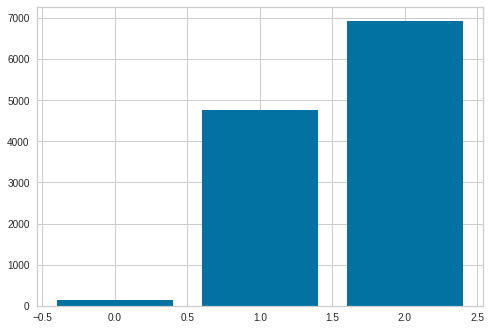

In [ ]:
fig = plt.bar(counter.keys(),counter.values())
fig

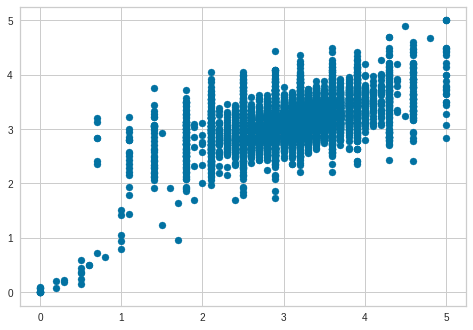

In [ ]:
plt.scatter(data3['agreeableness'],data3['Avg_Personality'])
plt.show() 

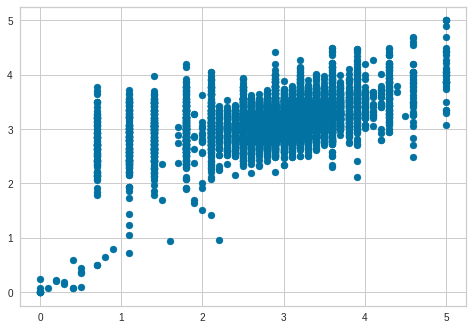

In [ ]:
plt.scatter(data3['extraversion'],data3['Avg_Personality'])
plt.show()

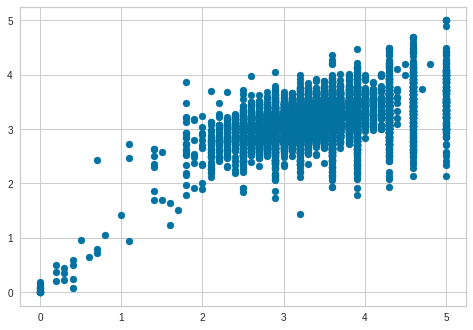

In [ ]:
plt.scatter(data3['openness'],data3['Avg_Personality'])
plt.show()

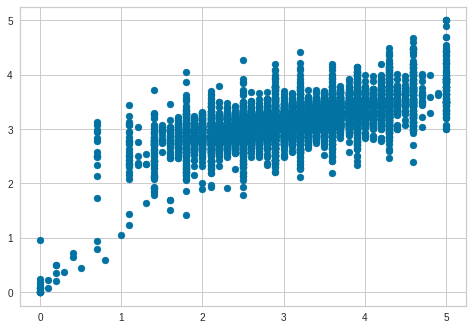

In [ ]:
plt.scatter(data3['neuroticism'],data3['Avg_Personality'])
plt.show()

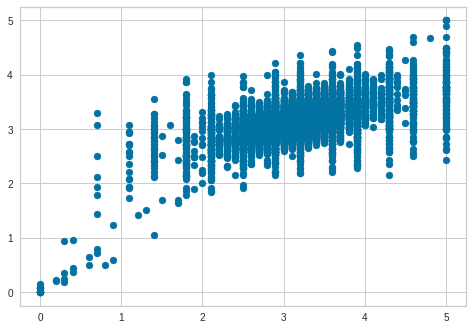

In [ ]:
plt.scatter(data3['conscientiousness'],data3['Avg_Personality'])
plt.show()

In [ ]:
x = counter.keys()
y = data3['Test']

In [ ]:
oversample = SMOTE()

In [ ]:
X1 = X
y1 = y
X1, y1 = oversample.fit_resample(X1, y1)

In [ ]:
counter = Counter(y1)
print(counter)

Counter({2: 6922, 1: 6922, 0: 6922})


In [ ]:
X1.shape

(20766, 8)

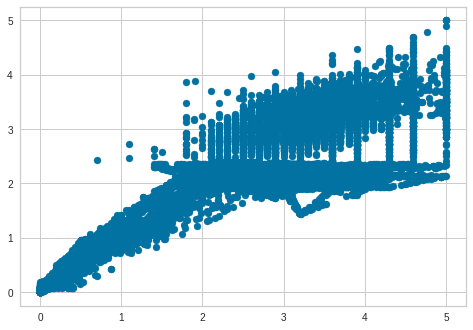

In [ ]:
fig_open = plt.scatter(X1['openness'],X1['Avg_Personality'])
fig_open

In [ ]:
undersample = RandomUnderSampler()

In [ ]:
X2 = X
y2 = y
X2, y2 = undersample.fit_resample(X2, y2)

In [ ]:
counter = Counter(y2)
print(counter)

Counter({0: 143, 1: 143, 2: 143})


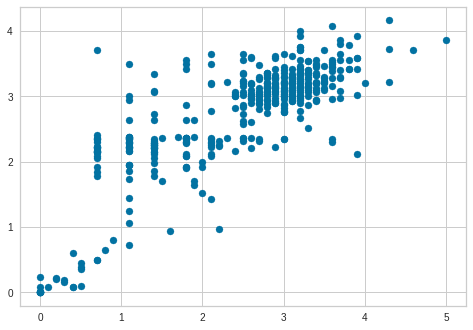

In [ ]:
plt.scatter(X2['extraversion'],X2['Avg_Personality'])
plt.show()

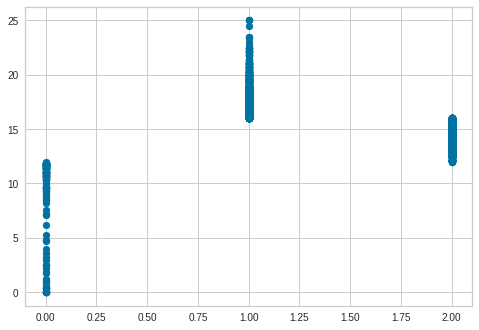

In [ ]:
plt.scatter(data3['Test'],data3['Personality'])
plt.show()

In [ ]:
#Down-Sampling Openness
import plotly.express as px

df = data3.head(429)
fig = px.scatter(df, x=X2['openness'], y=X2['Avg_Personality'], animation_frame="Test",size = 'openness')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Over - Sampling for Openness
import plotly.express as px

df = data3
fig = px.scatter(df, x=X1['openness'].head(11834), y=X1['Avg_Personality'].head(11834), animation_frame="Test",size = 'openness')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Down-Sampling Extraversion
import plotly.express as px

df = data3.head(429)
fig = px.scatter(df, x=X2['extraversion'], y=X2['Avg_Personality'], animation_frame="Test",size = 'extraversion')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Over - Sampling for Extraversion
import plotly.express as px

df = data3
fig = px.scatter(df, x=X1['extraversion'].head(11834), y=X1['Avg_Personality'].head(11834), animation_frame="Test",size = 'extraversion')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Down-Sampling agreeableness
import plotly.express as px

df = data3.head(429)
fig = px.scatter(df, x=X2['agreeableness'], y=X2['Avg_Personality'], animation_frame="Test",size = 'agreeableness')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Over - Sampling for Agreeableness
import plotly.express as px

df = data3
fig = px.scatter(df, x=X1['agreeableness'].head(11834), y=X1['Avg_Personality'].head(11834), animation_frame="Test",size = 'agreeableness')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Down-Sampling Neuroticism
import plotly.express as px

df = data3.head(429)
fig = px.scatter(df, x=X2['neuroticism'], y=X2['Avg_Personality'], animation_frame="Test",size = 'neuroticism')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Over - Sampling for Neuroticism
import plotly.express as px

df = data3
fig = px.scatter(df, x=X1['neuroticism'].head(11834), y=X1['Avg_Personality'].head(11834), animation_frame="Test",size = 'neuroticism')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Down-Sampling Conscientiusness
import plotly.express as px

df = data3.head(429)
fig = px.scatter(df, x=X2['conscientiousness'], y=X2['Avg_Personality'], animation_frame="Test",size = 'conscientiousness')

fig["layout"].pop("updatemenus")
fig.show()

In [ ]:
#Over - Sampling for Conscientiousnouss
import plotly.express as px

df = data3
fig = px.scatter(df, x=X1['conscientiousness'].head(11834), y=X1['Avg_Personality'].head(11834), animation_frame="Test",size = 'conscientiousness')

fig["layout"].pop("updatemenus")
fig.show()

###Muller Loop

In [ ]:
X = data3.drop(['Test'], axis=1)
y = data3['Test']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [ ]:
classifiers = [
    RandomForestClassifier(max_depth=3, random_state=17, n_estimators=10),
    KNeighborsClassifier(n_neighbors=3),
    MLPClassifier(random_state=17,learning_rate_init=0.01,max_iter=250),
    SVC(random_state = 17),
    DecisionTreeClassifier(max_depth=3, random_state=17)

]

In [ ]:
import time
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = Nearest Neighbors, Score (test, accuracy) = 98.65, Training time = 0.06 seconds
Classifier = Linear SVM, Score (test, accuracy) = 63.41, Training time = 0.10 seconds
Classifier = RBF SVM, Score (test, accuracy) = 77.65, Training time = 5.01 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 57.67, Training time = 9.03 seconds
Classifier = Decision Tree, Score (test, accuracy) = 99.58, Training time = 0.01 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = Decision Tree, Score (test, accuracy) = 99.58


For OverSampled Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=17)

In [ ]:
import time
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = Nearest Neighbors, Score (test, accuracy) = 99.76, Training time = 0.09 seconds
Classifier = Linear SVM, Score (test, accuracy) = 77.13, Training time = 0.17 seconds
Classifier = RBF SVM, Score (test, accuracy) = 93.07, Training time = 20.88 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 48.80, Training time = 37.66 seconds
Classifier = Decision Tree, Score (test, accuracy) = 99.76, Training time = 0.03 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = Nearest Neighbors, Score (test, accuracy) = 99.76


For UnderSampled Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=17)

In [ ]:
import time
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    start_time = time.time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time.time() - start_time))
    
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

Classifier = Nearest Neighbors, Score (test, accuracy) = 98.84, Training time = 0.02 seconds
Classifier = Linear SVM, Score (test, accuracy) = 41.86, Training time = 0.01 seconds
Classifier = RBF SVM, Score (test, accuracy) = 36.05, Training time = 0.05 seconds
Classifier = Gaussian Process, Score (test, accuracy) = 43.02, Training time = 0.01 seconds
Classifier = Decision Tree, Score (test, accuracy) = 100.00, Training time = 0.00 seconds


In [ ]:
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))

Best --> Classifier = Decision Tree, Score (test, accuracy) = 100.00


#References
######https://www.kaggle.com/akdagmelih/five-personality-clusters-k-means

######https://www.kernel-operations.io/keops/_auto_tutorials/kmeans/plot_kmeans_torch.html

#####https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

#####https://www.kaggle.com/tunguz/big-five-personality-test

#####https://github.com/ttimong/blog-posts/blob/master/blog1-kmeans-clustering/final_model.ipynb

#####https://ieeexplore.ieee.org/document/1540556

#####https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1?gi=7427d72f41d3



